<a href="https://colab.research.google.com/github/khushil-sketch/Data-Visualization-Experiments/blob/main/STA313_A1_trial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [32]:
# ATTENTION! YOU HAVE TO GIVE GOOGLE PERMISSION TO ACCESS YOUR DRIVE whenever you open the Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Load the CSV file into a pandas DataFrame
csv_file_path = "/content/drive/My Drive/toronto-movies.csv"

movies_df = pd.read_csv(csv_file_path)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     269 non-null    int64  
 1   actors         268 non-null    object 
 2   awards         224 non-null    object 
 3   box_office     0 non-null      float64
 4   country        269 non-null    object 
 5   director       267 non-null    object 
 6   dvd            7 non-null      object 
 7   genre          269 non-null    object 
 8   imdb_id        269 non-null    object 
 9   imdb_rating    267 non-null    float64
 10  imdb_votes     267 non-null    object 
 11  language       269 non-null    object 
 12  metascore      210 non-null    float64
 13  plot           268 non-null    object 
 14  poster         267 non-null    object 
 15  production     244 non-null    object 
 16  rated          260 non-null    object 
 17  ratings        269 non-null    object 
 18  released  

In [36]:
# What production comapnies created the highest rated films.
# Anything above 80 is considered to be a high rated film
# Filter by rating and then get group the films by each company that produced them.
# Pick out the 3 companies that have produced the most high rated films - display them with color and grey out the rest.

# call groupby method.
# new_df = movies_df.groupby('production')['metascore'].mean().reset_index()

# high_rated_df = new_df[movies_df['metascore'] > 70]
# high_rated_df.head()

# high_rated_df = movies_df[movies_df['metascore'] > 70]
# print(high_rated_df[['director', 'metascore']])

# WHICH DIRECTORS HAVE DIRECTED THE MOST TOP RATED FILMS i.e metascore > 70

# Group by director and count the number of films a director has produced, and the average rating of those films
filtered_df = movies_df.groupby('director').agg(
    film_count=('director', 'count'),
    avg_metascore=('metascore', 'mean')
).reset_index()  # Reset the index to make 'director' a column

# Filter to pick only high rated films and order in descending order of film count
top_rated = filtered_df[filtered_df['avg_metascore'] >= 70].sort_values(by=['film_count'], ascending=False)

# Display information about the top_rated DataFrame
top_rated = top_rated.head(10)
display(top_rated)

,director,film_count,avg_metascore
50,David Cronenberg,7,73.857143
196,Sarah Polley,2,78.000000
25,Bob Clark,2,71.000000
159,Norman Jewison,2,78.500000
146,Michael Moore,2,72.000000
15,Ang Lee,1,87.000000
123,Lenny Abrahamson,1,86.000000
180,Rob Marshall,1,81.000000
177,Richard Kwietniowski,1,70.000000
149,Michael Winterbottom,1,80.000000


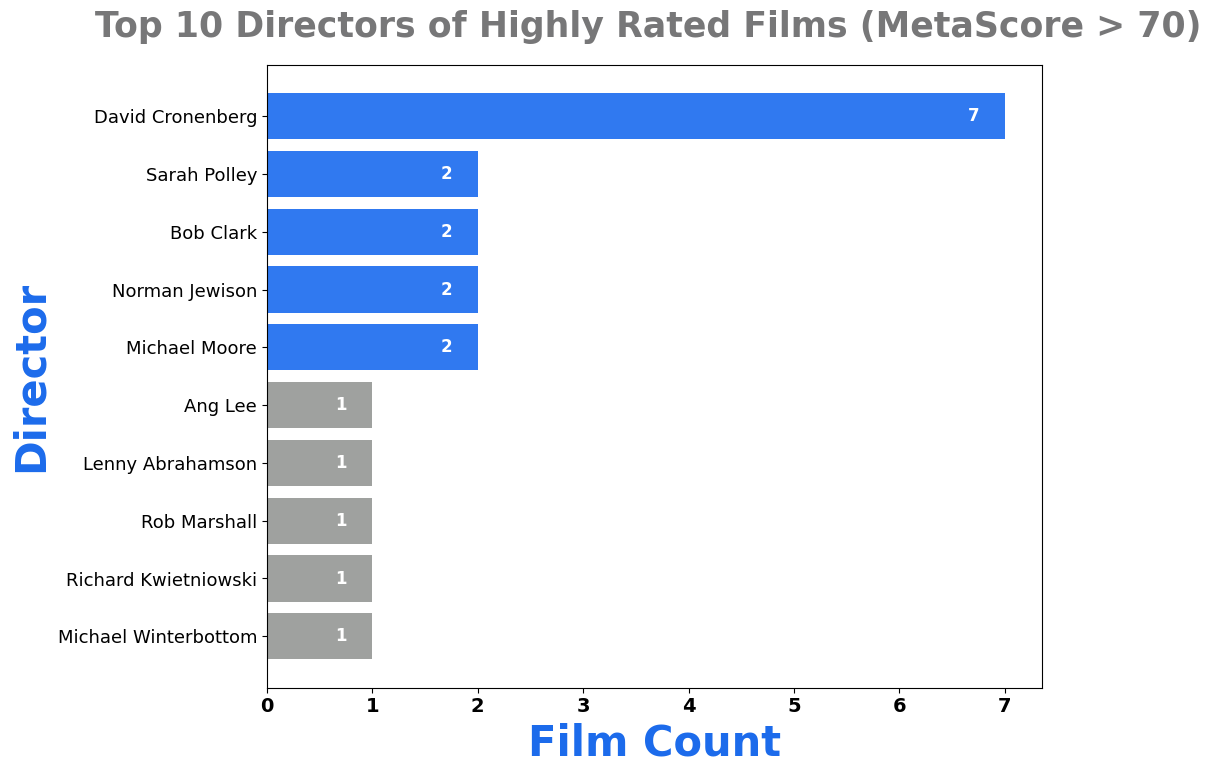

In [54]:
# Set plot style: grey grid in the background


# Set the figure size
plt.figure(figsize=(10, 7))

# Generate a list of colors based on the film_count condition
colors = ['#3079f0' if x > 1 else '#9fa19f' for x in top_rated['film_count']]

# Generate the y positions for each director
y_pos = np.arange(len(top_rated['director']))

# Plot a horizontal bar chart with conditional coloring
bars = plt.barh(y_pos, top_rated['film_count'], color=colors)

# Reverse the order to put the longest bar at the top
plt.gca().invert_yaxis()

plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Add grid to the plot
#plt.grid(True, which='both', axis='x', color='#777778', linestyle='-', linewidth=0.5)


# Label each bar with the director's name
for bar, film_count in zip(bars, top_rated['film_count']):
    width = bar.get_width()
    plt.text(width - 0.3,  # Position the text slightly left of the bar's right end
             bar.get_y() + bar.get_height() / 2,  # Position text in the middle of the bar vertically
             film_count,  # The text to display (director's name)
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=12)

# Set the y-ticks to the director names
plt.yticks(y_pos, top_rated['director'], fontsize=13, color='black')
plt.xticks(fontsize=14, color='black', fontweight='bold')  # Change '14' to your desired font size

# Set labels and title
plt.xlabel('Film Count', fontsize=30, fontweight='bold', color='#1c6beb')
plt.ylabel('Director', fontsize=30, fontweight='bold', color='#1c6beb')
plt.title('Top 10 Directors of Highly Rated Films (MetaScore > 70) ', fontsize=25, fontweight='bold', color='#777778', pad=20)

plt.subplots_adjust(top=1.0)  # Adjust this value to create more space at the top of the figure
plt.show()